The provided code encapsulates the implementation of the **"A novel ensemble learning-based model for network intrusion detection"** paper, applied to the UNSW-NB15 dataset.

Paper link: https://link.springer.com/article/10.1007/s40747-023-01013-7

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Stacking Learning with 42 Features

In [67]:
training_dataset = pd.read_csv("UNSW-NB15_Training_Processed.csv")
testing_dataset = pd.read_csv("UNSW-NB15_Testing_Processed.csv")

In [68]:
X_train = training_dataset.drop(["attack_cat","label"], axis = 1)
y_train = training_dataset['label'].values 

In [69]:
X_test = testing_dataset.drop(["attack_cat","label"], axis = 1)
y_test = testing_dataset['label'].values

In [70]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(175341, 42) (82332, 42) (175341,) (82332,)


In [ ]:
clf_lr = LogisticRegression(random_state = 42)
clf_lr.fit(X_train, y_train)

In [ ]:
y_pred_lr_train = clf_lr.predict(X_train)

train_acc_lr = accuracy_score(y_train,y_pred_lr_train)

print("Performance of Logistic Regression on Training Set:")
print("Accuracy: ", train_acc_lr)
print("Precision", precision_score(y_train,y_pred_lr_train, average='macro'))
print("Recall", recall_score(y_train,y_pred_lr_train, average='macro'))
print("F1_Score", f1_score(y_train,y_pred_lr_train, average='macro'))

print("")
print("Classification Report of Logistic Regression on Training Set: \n", classification_report(y_train, y_pred_lr_train))
target_names = ["0", "1"]
conf_mat_dt = confusion_matrix(y_train,y_pred_lr_train)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Logistic Regression on Training Set')
plt.show()

In [ ]:
y_pred_lr_test = clf_lr.predict(X_test)

test_acc_lr = accuracy_score(y_test,y_pred_lr_test)

print("")
print("Performance of Logistic Regression on Testing Set:")
print("Accuracy: ", test_acc_lr)
print("Precision", precision_score(y_test,y_pred_lr_test, average='macro'))
print("Recall", recall_score(y_test,y_pred_lr_test, average='macro'))
print("F1_Score", f1_score(y_test,y_pred_lr_test, average='macro'))

print("")
print("Classification Report of Logistic Regression on Testing Set: \n", classification_report(y_test,y_pred_lr_test))

conf_mat_dt = confusion_matrix(y_test,y_pred_lr_test)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Logistic Regression on Testing Set')
plt.show()

In [ ]:
lr_train = y_pred_lr_train
lr_test = y_pred_lr_test

# Gaussian NB

In [23]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

GaussianNB()


Performance of Gaussian NB on Training Set:
Accuracy:  0.8662948198082593
Precision:  0.8466622463123796
Recall:  0.8451332306912844
F1_Score:  0.8458892798685302

Classification Report of Gaussian NB on Training Set: 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     56000
           1       0.90      0.90      0.90    119341

    accuracy                           0.87    175341
   macro avg       0.85      0.85      0.85    175341
weighted avg       0.87      0.87      0.87    175341



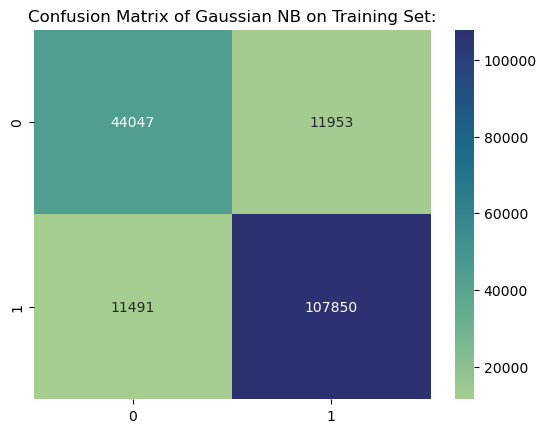

In [24]:
y_pred_gnb_train = clf_gnb.predict(X_train)

train_acc_rf = accuracy_score(y_train,y_pred_gnb_train)

print("")
print("Performance of Gaussian NB on Training Set:")
print("Accuracy: ", train_acc_rf)
print("Precision: ", precision_score(y_train,y_pred_gnb_train, average='macro'))
print("Recall: ", recall_score(y_train,y_pred_gnb_train, average='macro'))
print("F1_Score: ", f1_score(y_train,y_pred_gnb_train, average='macro'))

print("")
print("Classification Report of Gaussian NB on Training Set: \n", classification_report(y_train,y_pred_gnb_train))

conf_mat_rf = confusion_matrix(y_train,y_pred_gnb_train)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Gaussian NB on Training Set:')
plt.show()


Performance of Gaussian NB on Testing Set:
Accuracy:  0.7520283729291163
Precision:  0.767996249159867
Recall:  0.7364301275156742
F1_Score:  0.7383478371259169

Classification Report of Gaussian NB on Testing Set:: 
               precision    recall  f1-score   support

           0       0.81      0.58      0.68     37000
           1       0.72      0.89      0.80     45332

    accuracy                           0.75     82332
   macro avg       0.77      0.74      0.74     82332
weighted avg       0.76      0.75      0.74     82332



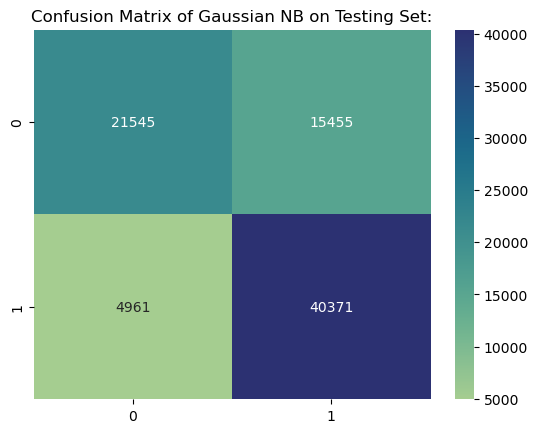

In [25]:
y_pred_gnb_test = clf_gnb.predict(X_test)

test_acc_gnb = accuracy_score(y_test,y_pred_gnb_test)

print("")
print("Performance of Gaussian NB on Testing Set:")
print("Accuracy: ", test_acc_gnb)
print("Precision: ", precision_score(y_test,y_pred_gnb_test, average='macro'))
print("Recall: ", recall_score(y_test,y_pred_gnb_test, average='macro'))
print("F1_Score: ", f1_score(y_test,y_pred_gnb_test, average='macro'))

print("")
print("Classification Report of Gaussian NB on Testing Set:: \n", classification_report(y_test,y_pred_gnb_test))

conf_mat_rf = confusion_matrix(y_test,y_pred_gnb_test)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Gaussian NB on Testing Set:')
plt.show()

In [26]:
gnb_train = y_pred_gnb_train
gnb_test = y_pred_gnb_test

# Decision Tree

In [27]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Performance of Decision Tree on Training Set:
Accuracy:  0.9981692815713381
Precision 0.9977655918561485
Recall 0.998024841106577
F1_Score 0.9978950698431723

Classification Report of Decision Tree on  Training Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56000
           1       1.00      1.00      1.00    119341

    accuracy                           1.00    175341
   macro avg       1.00      1.00      1.00    175341
weighted avg       1.00      1.00      1.00    175341



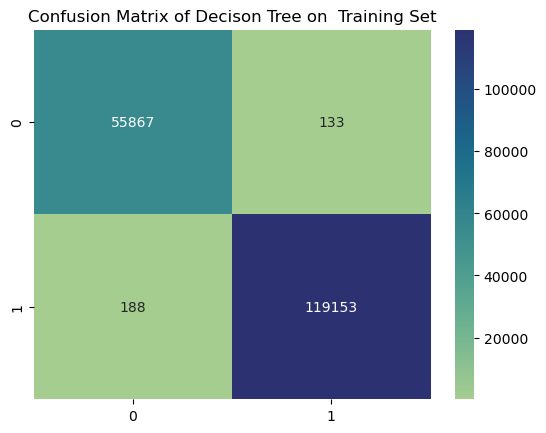

In [28]:
y_pred_dt_train = clf_dt.predict(X_train)

train_acc_dt = accuracy_score(y_train, y_pred_dt_train)

print("Performance of Decision Tree on Training Set:")
print("Accuracy: ", train_acc_dt)
print("Precision", precision_score(y_train,y_pred_dt_train, average='macro'))
print("Recall", recall_score(y_train,y_pred_dt_train, average='macro'))
print("F1_Score", f1_score(y_train, y_pred_dt_train, average='macro'))

print("")
print("Classification Report of Decision Tree on  Training Set: \n", classification_report(y_train,y_pred_dt_train))

conf_mat_dt = confusion_matrix(y_train,y_pred_dt_train)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Decison Tree on  Training Set')
plt.show()


Performance of Decision Tree on Testing Set:
Accuracy:  0.8588762571053782
Precision 0.874532910543282
Recall 0.848127905590228
F1_Score 0.8534724397078324

Classification Report of Decision Tree on Testing Set: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83     37000
           1       0.82      0.95      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.87      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332



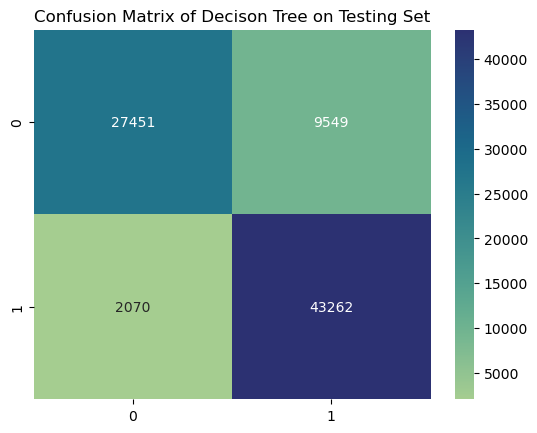

In [29]:
y_pred_dt_test = clf_dt.predict(X_test)

test_acc_dt = accuracy_score(y_test,y_pred_dt_test)

print("")
print("Performance of Decision Tree on Testing Set:")
print("Accuracy: ", test_acc_dt)
print("Precision", precision_score(y_test,y_pred_dt_test, average='macro'))
print("Recall", recall_score(y_test,y_pred_dt_test, average='macro'))
print("F1_Score", f1_score(y_test,y_pred_dt_test, average='macro'))

print("")
print("Classification Report of Decision Tree on Testing Set: \n", classification_report(y_test,y_pred_dt_test))

conf_mat_dt = confusion_matrix(y_test,y_pred_dt_test)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Decison Tree on Testing Set')
plt.show()

In [30]:
dt_train = y_pred_dt_train
dt_test = y_pred_dt_test

# Stochastic Gradient Descent

In [31]:
clf_sgd = SGDClassifier(random_state = 42)
clf_sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

Performance of Stochastic Gradient Descent on Training Set:
Accuracy:  0.9331588162494796
Precision 0.9534643725523271
Recall 0.89643287235437
F1_Score 0.9183821133598575

Classification Report of Stochastic Gradient Descent on Training Set: 
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     56000
           1       0.91      1.00      0.95    119341

    accuracy                           0.93    175341
   macro avg       0.95      0.90      0.92    175341
weighted avg       0.94      0.93      0.93    175341



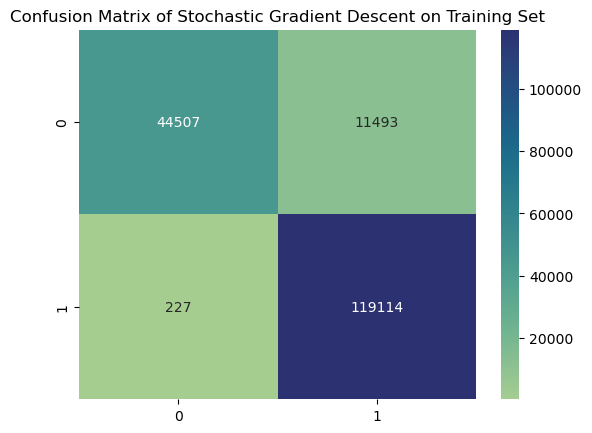

In [32]:
y_pred_sgd_train = clf_sgd.predict(X_train)

train_acc_sgd = accuracy_score(y_train, y_pred_sgd_train)

print("Performance of Stochastic Gradient Descent on Training Set:")
print("Accuracy: ", train_acc_sgd)
print("Precision", precision_score(y_train, y_pred_sgd_train, average='macro'))
print("Recall", recall_score(y_train, y_pred_sgd_train, average='macro'))
print("F1_Score", f1_score(y_train, y_pred_sgd_train, average='macro'))

print("")
print("Classification Report of Stochastic Gradient Descent on Training Set: \n", classification_report(y_train, y_pred_sgd_train))

conf_mat_sgd = confusion_matrix(y_train, y_pred_sgd_train)
sns.heatmap(conf_mat_sgd, annot=True, fmt='d', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Stochastic Gradient Descent on Training Set')
plt.show()


Performance of Stochastic Gradient Descent on Testing Set:
Accuracy:  0.8093572365544381
Precision 0.8704345412887169
Recall 0.7880160807591321
F1_Score 0.7917690638749053

Classification Report of Stochastic Gradient Descent on Testing Set: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73     37000
           1       0.74      1.00      0.85     45332

    accuracy                           0.81     82332
   macro avg       0.87      0.79      0.79     82332
weighted avg       0.86      0.81      0.80     82332



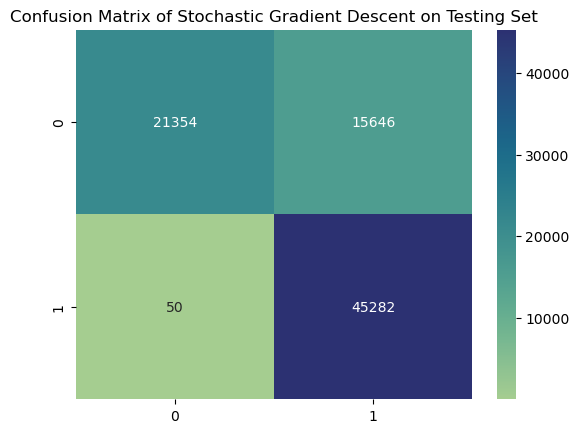

In [33]:
y_pred_sgd_test = clf_sgd.predict(X_test)

test_acc_sgd = accuracy_score(y_test, y_pred_sgd_test)

print("")
print("Performance of Stochastic Gradient Descent on Testing Set:")
print("Accuracy: ", test_acc_sgd)
print("Precision", precision_score(y_test, y_pred_sgd_test, average='macro'))
print("Recall", recall_score(y_test, y_pred_sgd_test, average='macro'))
print("F1_Score", f1_score(y_test, y_pred_sgd_test, average='macro'))

print("")
print("Classification Report of Stochastic Gradient Descent on Testing Set: \n", classification_report(y_test, y_pred_sgd_test))

conf_mat_sgd = confusion_matrix(y_test, y_pred_sgd_test)
sns.heatmap(conf_mat_sgd, annot=True, fmt='d', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Stochastic Gradient Descent on Testing Set')
plt.show()

# Stacking Ensemble Learning with SGD as meta classifier and 42 Features

In [34]:
min_len_train = min(len(lr_train), len(gnb_train), len(dt_train), len(y_train))

base_predictions_train = pd.DataFrame({
    'Logistic Regression': [lr_train[i] for i in range(min_len_train)],
    'Gaussian NB': [gnb_train[i] for i in range(min_len_train)],
    'Decision Tree': [dt_train[i] for i in range(min_len_train)],
    'Label': [y_train[i] for i in range(min_len_train)]
})

base_predictions_train

,Logistic Regression,Gaussian NB,Decision Tree,Label
0,1,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
175336,1,1,1,1
175337,1,1,1,1
175338,1,1,1,1
175339,1,1,1,1


In [35]:
min_len_test = min(len(lr_test), len(gnb_test), len(dt_test), len(y_test))

base_predictions_test = pd.DataFrame({
    'Logistic Regression': [lr_test[i] for i in range(min_len_test)],
    'Gaussian NB': [gnb_test[i] for i in range(min_len_test)],
    'Decision Tree': [dt_test[i] for i in range(min_len_test)],
    'Label': [y_test[i] for i in range(min_len_test)]
})

base_predictions_test

,Logistic Regression,Gaussian NB,Decision Tree,Label
0,1,1,1,0
1,1,1,0,0
2,1,1,1,0
3,1,1,0,0
4,1,1,1,0
...,...,...,...,...
82327,1,1,1,0
82328,1,1,1,0
82329,0,0,0,0
82330,0,0,0,0


In [36]:
lr_train = lr_train.reshape(-1, 1)
lr_test = lr_test.reshape(-1, 1)
gnb_train = gnb_train.reshape(-1, 1)
gnb_test = gnb_test.reshape(-1, 1)
dt_train = dt_train.reshape(-1, 1)
dt_test = dt_test.reshape(-1, 1)

In [37]:
x_train = np.concatenate(( lr_train, gnb_train, dt_train), axis=1)
x_test = np.concatenate(( lr_test, gnb_test, dt_test), axis=1)

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((175341, 3), (175341,), (82332, 3), (82332,))

Testing accuracy of Stacking Ensemble Learning:  0.8588762571053782
Precision of Stacking Ensemble Learning:  0.874532910543282
Recall of Stacking Ensemble Learning: 0.848127905590228
F1_Score of Stacking Ensemble Learning: 0.8534724397078324

Classification Report of Stacking Ensemble Learning: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83     37000
           1       0.82      0.95      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.87      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332



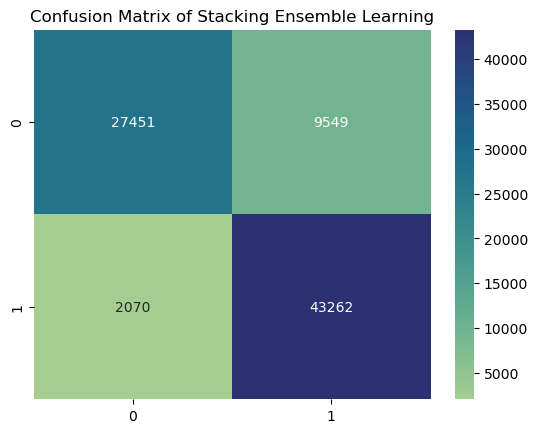

In [39]:
stacking_ensemble = SGDClassifier()
stacking_ensemble.fit(x_train, y_train)

y_pred_stacking = stacking_ensemble.predict(x_test)

print("Testing accuracy of Stacking Ensemble Learning: ", accuracy_score(y_test,y_pred_stacking))
print("Precision of Stacking Ensemble Learning: ", precision_score(y_test, y_pred_stacking, average='macro'))
print("Recall of Stacking Ensemble Learning:", recall_score(y_test, y_pred_stacking, average='macro'))
print("F1_Score of Stacking Ensemble Learning:", f1_score(y_test, y_pred_stacking, average='macro'))

print("")
print("Classification Report of Stacking Ensemble Learning: \n", classification_report(y_test, y_pred_stacking))

conf_mat_ada = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(conf_mat_ada, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Stacking Ensemble Learning')
plt.show()


# Stacking Learning with 39 Features

In [40]:
training_dataset = pd.read_csv("UNSW_training_P-value.csv")
testing_dataset = pd.read_csv("UNSW_testing_P-value.csv")

In [41]:
X_train = training_dataset.drop(["attack_cat","label"], axis = 1)
y_train = training_dataset['label'].values 

In [42]:
X_test = testing_dataset.drop(["attack_cat","label"], axis = 1)
y_test = testing_dataset['label'].values

In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(175341, 39) (82332, 39) (175341,) (82332,)


# Logistic Regression

In [45]:
clf_lr = LogisticRegression(random_state = 42)
clf_lr.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Performance of Logistic Regression on Training Set:
Accuracy:  0.9318584928795889
Precision 0.9459921628786057
Recall 0.8986005592318291
F1_Score 0.9175419831864063

Classification Report of Logistic Regression on Training Set: 
               precision    recall  f1-score   support

           0       0.98      0.81      0.88     56000
           1       0.92      0.99      0.95    119341

    accuracy                           0.93    175341
   macro avg       0.95      0.90      0.92    175341
weighted avg       0.94      0.93      0.93    175341



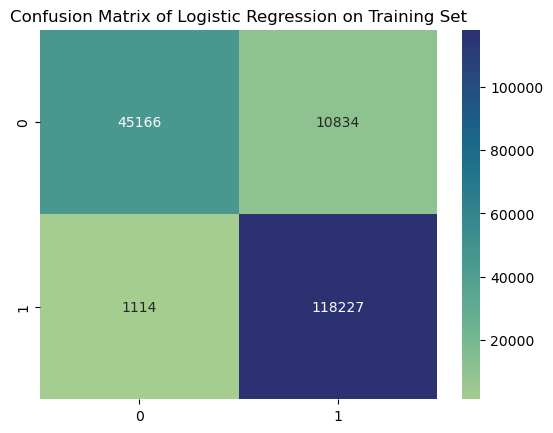

In [46]:
y_pred_lr_train = clf_lr.predict(X_train)

train_acc_lr = accuracy_score(y_train,y_pred_lr_train)

print("Performance of Logistic Regression on Training Set:")
print("Accuracy: ", train_acc_lr)
print("Precision", precision_score(y_train,y_pred_lr_train, average='macro'))
print("Recall", recall_score(y_train,y_pred_lr_train, average='macro'))
print("F1_Score", f1_score(y_train,y_pred_lr_train, average='macro'))

print("")
print("Classification Report of Logistic Regression on Training Set: \n", classification_report(y_train, y_pred_lr_train))
target_names = ["0", "1"]
conf_mat_dt = confusion_matrix(y_train,y_pred_lr_train)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Logistic Regression on Training Set')
plt.show()


Performance of Logistic Regression on Testing Set:
Accuracy:  0.8040130204537725
Precision 0.8492131078519771
Recall 0.7846930036892977
F1_Score 0.788562661337276

Classification Report of Logistic Regression on Testing Set: 
               precision    recall  f1-score   support

           0       0.95      0.59      0.73     37000
           1       0.75      0.98      0.85     45332

    accuracy                           0.80     82332
   macro avg       0.85      0.78      0.79     82332
weighted avg       0.84      0.80      0.79     82332



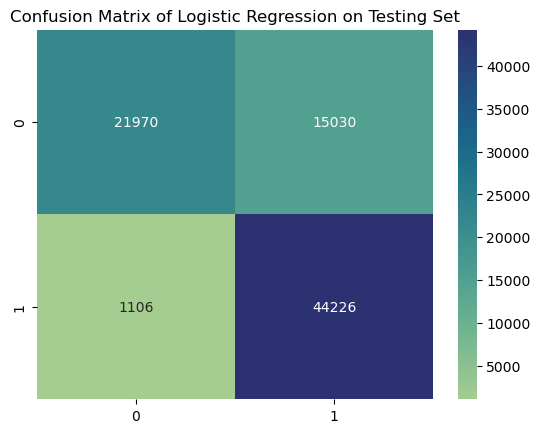

In [47]:
y_pred_lr_test = clf_lr.predict(X_test)

test_acc_lr = accuracy_score(y_test,y_pred_lr_test)

print("")
print("Performance of Logistic Regression on Testing Set:")
print("Accuracy: ", test_acc_lr)
print("Precision", precision_score(y_test,y_pred_lr_test, average='macro'))
print("Recall", recall_score(y_test,y_pred_lr_test, average='macro'))
print("F1_Score", f1_score(y_test,y_pred_lr_test, average='macro'))

print("")
print("Classification Report of Logistic Regression on Testing Set: \n", classification_report(y_test,y_pred_lr_test))

conf_mat_dt = confusion_matrix(y_test,y_pred_lr_test)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Logistic Regression on Testing Set')
plt.show()

In [48]:
lr_train = y_pred_lr_train
lr_test = y_pred_lr_test

# Gaussian NB

In [49]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

GaussianNB()


Performance of Gaussian NB on Training Set:
Accuracy:  0.8771308478906816
Precision:  0.8642231241099344
Recall:  0.8487006561030995
F1_Score:  0.8557115447684125

Classification Report of Gaussian NB on Training Set: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80     56000
           1       0.90      0.93      0.91    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.85      0.86    175341
weighted avg       0.88      0.88      0.88    175341



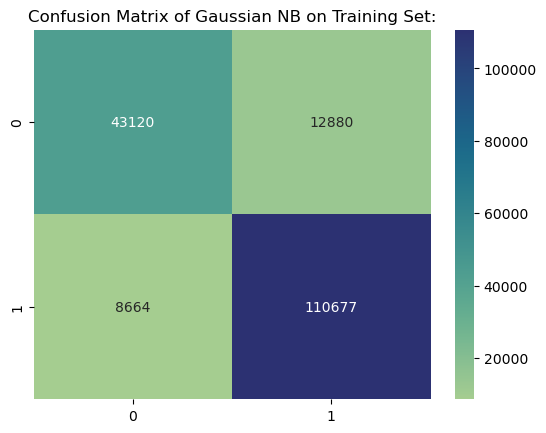

In [50]:
y_pred_gnb_train = clf_gnb.predict(X_train)

train_acc_rf = accuracy_score(y_train,y_pred_gnb_train)

print("")
print("Performance of Gaussian NB on Training Set:")
print("Accuracy: ", train_acc_rf)
print("Precision: ", precision_score(y_train,y_pred_gnb_train, average='macro'))
print("Recall: ", recall_score(y_train,y_pred_gnb_train, average='macro'))
print("F1_Score: ", f1_score(y_train,y_pred_gnb_train, average='macro'))

print("")
print("Classification Report of Gaussian NB on Training Set: \n", classification_report(y_train,y_pred_gnb_train))

conf_mat_rf = confusion_matrix(y_train,y_pred_gnb_train)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Gaussian NB on Training Set:')
plt.show()


Performance of Gaussian NB on Testing Set:
Accuracy:  0.7598989457319146
Precision:  0.7881311972918816
Recall:  0.7414786046966405
F1_Score:  0.7429109662833938

Classification Report of Gaussian NB on Testing Set:: 
               precision    recall  f1-score   support

           0       0.86      0.56      0.68     37000
           1       0.72      0.92      0.81     45332

    accuracy                           0.76     82332
   macro avg       0.79      0.74      0.74     82332
weighted avg       0.78      0.76      0.75     82332



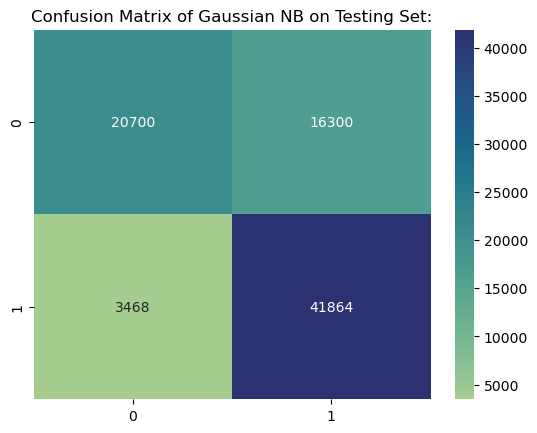

In [51]:
y_pred_gnb_test = clf_gnb.predict(X_test)

test_acc_gnb = accuracy_score(y_test,y_pred_gnb_test)

print("")
print("Performance of Gaussian NB on Testing Set:")
print("Accuracy: ", test_acc_gnb)
print("Precision: ", precision_score(y_test,y_pred_gnb_test, average='macro'))
print("Recall: ", recall_score(y_test,y_pred_gnb_test, average='macro'))
print("F1_Score: ", f1_score(y_test,y_pred_gnb_test, average='macro'))

print("")
print("Classification Report of Gaussian NB on Testing Set:: \n", classification_report(y_test,y_pred_gnb_test))

conf_mat_rf = confusion_matrix(y_test,y_pred_gnb_test)
sns.heatmap(conf_mat_rf, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Gaussian NB on Testing Set:')
plt.show()

In [52]:
gnb_train = y_pred_gnb_train
gnb_test = y_pred_gnb_test

# Decision Tree

In [53]:
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Performance of Decision Tree on Training Set:
Accuracy:  0.9981692815713381
Precision 0.9977655918561485
Recall 0.998024841106577
F1_Score 0.9978950698431723

Classification Report of Decision Tree on  Training Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56000
           1       1.00      1.00      1.00    119341

    accuracy                           1.00    175341
   macro avg       1.00      1.00      1.00    175341
weighted avg       1.00      1.00      1.00    175341



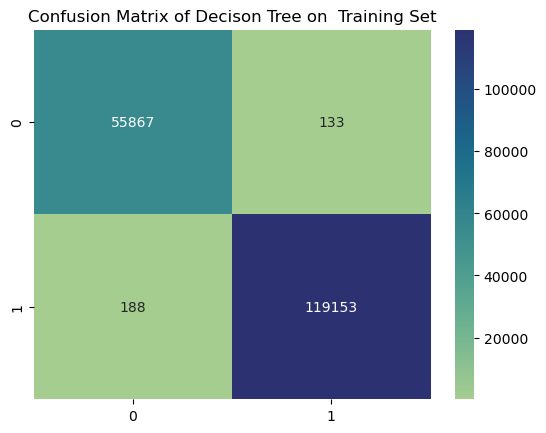

In [54]:
y_pred_dt_train = clf_dt.predict(X_train)

train_acc_dt = accuracy_score(y_train, y_pred_dt_train)

print("Performance of Decision Tree on Training Set:")
print("Accuracy: ", train_acc_dt)
print("Precision", precision_score(y_train,y_pred_dt_train, average='macro'))
print("Recall", recall_score(y_train,y_pred_dt_train, average='macro'))
print("F1_Score", f1_score(y_train, y_pred_dt_train, average='macro'))

print("")
print("Classification Report of Decision Tree on  Training Set: \n", classification_report(y_train,y_pred_dt_train))

conf_mat_dt = confusion_matrix(y_train,y_pred_dt_train)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Decison Tree on  Training Set')
plt.show()


Performance of Decision Tree on Testing Set:
Accuracy:  0.858463294952145
Precision 0.8747461005233652
Recall 0.8475194194900804
F1_Score 0.8529334306178761

Classification Report of Decision Tree on Testing Set: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82     37000
           1       0.82      0.96      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.87      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332



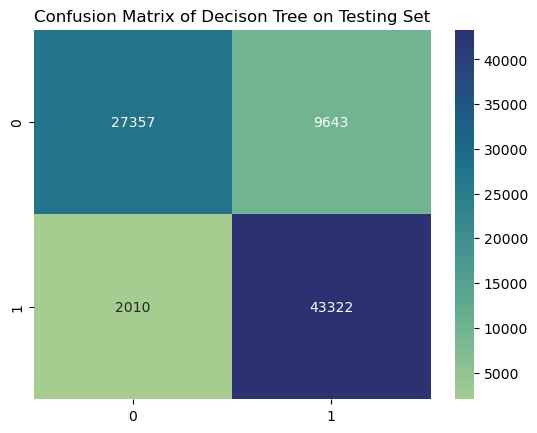

In [55]:
y_pred_dt_test = clf_dt.predict(X_test)

test_acc_dt = accuracy_score(y_test,y_pred_dt_test)

print("")
print("Performance of Decision Tree on Testing Set:")
print("Accuracy: ", test_acc_dt)
print("Precision", precision_score(y_test,y_pred_dt_test, average='macro'))
print("Recall", recall_score(y_test,y_pred_dt_test, average='macro'))
print("F1_Score", f1_score(y_test,y_pred_dt_test, average='macro'))

print("")
print("Classification Report of Decision Tree on Testing Set: \n", classification_report(y_test,y_pred_dt_test))

conf_mat_dt = confusion_matrix(y_test,y_pred_dt_test)
sns.heatmap(conf_mat_dt, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Decison Tree on Testing Set')
plt.show()

In [56]:
dt_train = y_pred_dt_train
dt_test = y_pred_dt_test

# SGD

In [57]:
clf_sgd = SGDClassifier(random_state = 42)
clf_sgd.fit(X_train, y_train)

SGDClassifier(random_state=42)

Performance of Stochastic Gradient Descent on Training Set:
Accuracy:  0.9332044416308792
Precision 0.953556047012478
Recall 0.8964663897540901
F1_Score 0.9184339579401263

Classification Report of Stochastic Gradient Descent on Training Set: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88     56000
           1       0.91      1.00      0.95    119341

    accuracy                           0.93    175341
   macro avg       0.95      0.90      0.92    175341
weighted avg       0.94      0.93      0.93    175341



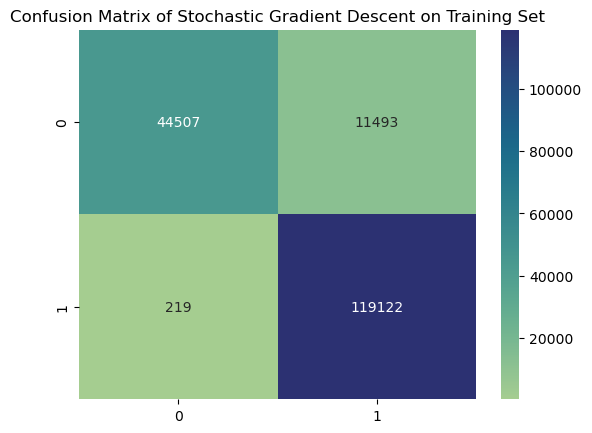

In [58]:
y_pred_sgd_train = clf_sgd.predict(X_train)

train_acc_sgd = accuracy_score(y_train, y_pred_sgd_train)

print("Performance of Stochastic Gradient Descent on Training Set:")
print("Accuracy: ", train_acc_sgd)
print("Precision", precision_score(y_train, y_pred_sgd_train, average='macro'))
print("Recall", recall_score(y_train, y_pred_sgd_train, average='macro'))
print("F1_Score", f1_score(y_train, y_pred_sgd_train, average='macro'))

print("")
print("Classification Report of Stochastic Gradient Descent on Training Set: \n", classification_report(y_train, y_pred_sgd_train))

conf_mat_sgd = confusion_matrix(y_train, y_pred_sgd_train)
sns.heatmap(conf_mat_sgd, annot=True, fmt='d', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Stochastic Gradient Descent on Training Set')
plt.show()



Performance of Stochastic Gradient Descent on Testing Set:
Accuracy:  0.8093572365544381
Precision 0.8704345412887169
Recall 0.7880160807591321
F1_Score 0.7917690638749053

Classification Report of Stochastic Gradient Descent on Testing Set: 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73     37000
           1       0.74      1.00      0.85     45332

    accuracy                           0.81     82332
   macro avg       0.87      0.79      0.79     82332
weighted avg       0.86      0.81      0.80     82332



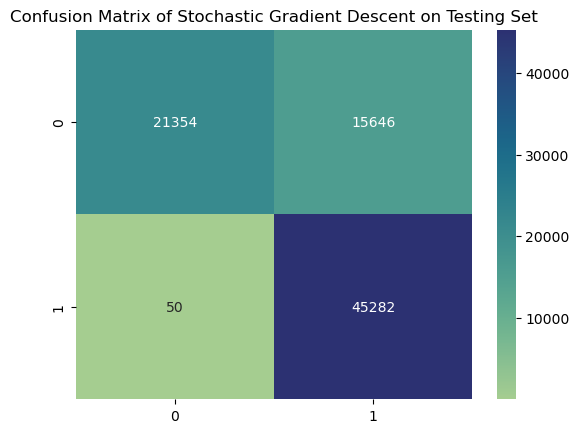

In [59]:
y_pred_sgd_test = clf_sgd.predict(X_test)

test_acc_sgd = accuracy_score(y_test, y_pred_sgd_test)

print("")
print("Performance of Stochastic Gradient Descent on Testing Set:")
print("Accuracy: ", test_acc_sgd)
print("Precision", precision_score(y_test, y_pred_sgd_test, average='macro'))
print("Recall", recall_score(y_test, y_pred_sgd_test, average='macro'))
print("F1_Score", f1_score(y_test, y_pred_sgd_test, average='macro'))

print("")
print("Classification Report of Stochastic Gradient Descent on Testing Set: \n", classification_report(y_test, y_pred_sgd_test))

conf_mat_sgd = confusion_matrix(y_test, y_pred_sgd_test)
sns.heatmap(conf_mat_sgd, annot=True, fmt='d', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Stochastic Gradient Descent on Testing Set')
plt.show()


# Stacking Ensemble Learning with SGD as Meta Learner

In [60]:
min_len_train = min(len(lr_train), len(gnb_train), len(dt_train), len(y_train))

base_predictions_train = pd.DataFrame({
    'Logistic Regression': [lr_train[i] for i in range(min_len_train)],
    'Gaussian NB': [gnb_train[i] for i in range(min_len_train)],
    'Decision Tree': [dt_train[i] for i in range(min_len_train)],
    'Label': [y_train[i] for i in range(min_len_train)]
})

base_predictions_train

,Logistic Regression,Gaussian NB,Decision Tree,Label
0,1,1,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
175336,1,1,1,1
175337,1,1,1,1
175338,1,1,1,1
175339,1,1,1,1


In [61]:
min_len_test = min(len(lr_test), len(gnb_test), len(dt_test), len(y_test))

base_predictions_test = pd.DataFrame({
    'Logistic Regression': [lr_test[i] for i in range(min_len_test)],
    'Gaussian NB': [gnb_test[i] for i in range(min_len_test)],
    'Decision Tree': [dt_test[i] for i in range(min_len_test)],
    'Label': [y_test[i] for i in range(min_len_test)]
})

base_predictions_test

,Logistic Regression,Gaussian NB,Decision Tree,Label
0,1,1,0,0
1,1,1,0,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0
...,...,...,...,...
82327,1,1,1,0
82328,1,1,1,0
82329,0,0,0,0
82330,0,0,0,0


In [62]:
lr_train = lr_train.reshape(-1, 1)
lr_test = lr_test.reshape(-1, 1)
gnb_train = gnb_train.reshape(-1, 1)
gnb_test = gnb_test.reshape(-1, 1)
dt_train = dt_train.reshape(-1, 1)
dt_test = dt_test.reshape(-1, 1)

In [63]:
x_train = np.concatenate(( lr_train, gnb_train, dt_train), axis=1)
x_test = np.concatenate(( lr_test, gnb_test, dt_test), axis=1)

In [64]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((175341, 3), (175341,), (82332, 3), (82332,))

Testing accuracy of Stacking Ensemble Learning:  0.858463294952145
Precision of Stacking Ensemble Learning:  0.8747461005233652
Recall of Stacking Ensemble Learning: 0.8475194194900804
F1_Score of Stacking Ensemble Learning: 0.8529334306178761

Classification Report of Stacking Ensemble Learning: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.82     37000
           1       0.82      0.96      0.88     45332

    accuracy                           0.86     82332
   macro avg       0.87      0.85      0.85     82332
weighted avg       0.87      0.86      0.86     82332



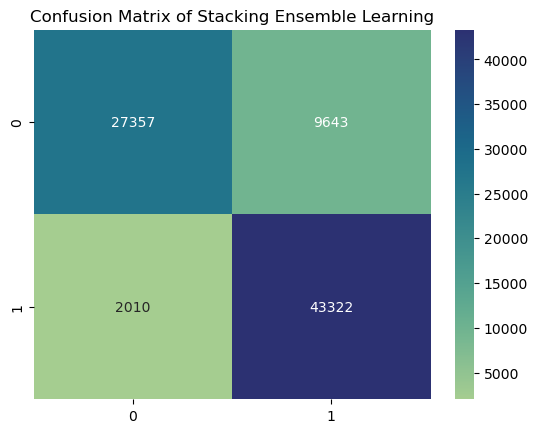

In [65]:
stacking_ensemble = SGDClassifier()
stacking_ensemble.fit(x_train, y_train)

y_pred_stacking = stacking_ensemble.predict(x_test)

print("Testing accuracy of Stacking Ensemble Learning: ", accuracy_score(y_test,y_pred_stacking))
print("Precision of Stacking Ensemble Learning: ", precision_score(y_test, y_pred_stacking, average='macro'))
print("Recall of Stacking Ensemble Learning:", recall_score(y_test, y_pred_stacking, average='macro'))
print("F1_Score of Stacking Ensemble Learning:", f1_score(y_test, y_pred_stacking, average='macro'))

print("")
print("Classification Report of Stacking Ensemble Learning: \n", classification_report(y_test, y_pred_stacking))

conf_mat_ada = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(conf_mat_ada, annot=True, fmt = 'd', cmap="crest", xticklabels=target_names)
plt.title('Confusion Matrix of Stacking Ensemble Learning')
plt.show()
